# Problem Statment  : 

To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.

# Attribute Information:

Given are the variable name, variable type, the measurement unit, and a brief description. 
The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

      Name                                      Data Type              Measurement                 Description
      
    1. Cement (cement)                         quantitative          kg in a m3 mixture           Input Variable
    2. Blast Furnace Slag (slag)               quantitative          kg in a m3 mixture           Input Variable
    3. Fly Ash (ash)                           quantitative          kg in a m3 mixture           Input Variable
    4. Water(water)                            quantitative          kg in a m3 mixture           Input Variable
    5. Superplasticizer (superplastic)         quantitative          kg in a m3 mixture           Input Variable
    6. Coarse Aggregate (coarseagg)            quantitative          kg in a m3 mixture           Input Variable
    7. Fine Aggregate (fineagg)                quantitative          kg in a m3 mixture           Input Variable
    8. Age(age)                                quantitative          Day (1~365)                  Input Variable

    9. Concrete compressive strength(strength) quantitative          MPa                          Output Variable

# Steps and Tasks:

### Exploratory Data Quality Report Reflecting the Following:

    1. Univariate analysis –data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviationand quartiles, analysis of the body of distributions/tails, missing values, outliers, duplicates(10 Marks)

    2. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves. (10 Marks)

    3. Feature Engineering techniques(10 Marks)
    
    3.1 Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) 
    Hint: Feature Extraction, for example, consider a dataset with two features length and breadth From this, we can extract a new feature Area which would be length * breadth.
    
    3.2 Get the data model ready and do a train test split.

    3.3 Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree.
    
### Creating the Model and Tuning It:

    4. Algorithms that you think will be suitable for this project.Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there). (15 Marks)
    
    5. Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 Marks)

## Steps 
1. Data loading and preprocessing
2. Exploratory Data Analysis
3. Model building and evaluation
4. Model Tuning
5. Implementing the process through Pipeline

### Data loading and preprocessing

####  Import Pandas, Numpy, pyplot and seaborn

In [782]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")           # Not always recommended, but jsut so our notebook looks clean for this activity

#### Import the dataframes "concrete.csv" 

In [783]:
df1 = pd.read_csv("C:\\MyData\\AIML\\Dataset\\concrete.csv")  # Read the data regarding Concrete strength
df1.shape

(1030, 9)

In [784]:
print(design_report)

### Exploratory Data Analysis

Exploratory Data Analysis using Pandas Profiling, this is alternate way of doing exploratry data analysis.

In [785]:
from pandas_profiling import ProfileReport         # Exploratory Data analysis can be done using Pandas Profiling
design_report = ProfileReport(df1)
design_report.to_file(output_file='report.html')
df1.profile_report()

######  Pandas Profiling Report Analysis
    1. Dataset has 9 variable with 1030 entries
    2. has 25 Duplicate entries (2.4%) in dataset
    3. No cells with null values
    4. slag, ash, superplastic variables has Zeros (check if these are missing values)
    5. Age is highly skewed
    6. strength (target Varibale) has normal distribution
    7. Cement, age, superplastic has positivee coorelation with Strength

### 1. Univariate Analysis

In [786]:
df1.head().round(2)                     # check the first five entries in data frame, Round the values to 2 decimal Points

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [787]:
(df1==0).sum()        ## check number of zeros in the column 

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

In [788]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [789]:
# cheking the Null Values in dataframe
df1.isnull().apply(pd.value_counts) 

cement  slag   ash  water  superplastic  coarseagg  fineagg   age  \
False    1030  1030  1030   1030          1030       1030     1030  1030   

       strength  
False      1030

##### No null values, All variables are continuous except age
##### ***Our target variable is strength, a continuous varibale. Therefore we will use regressor version of all algorithms ***

In [790]:
#Check for duplicate rows
df1.duplicated().sum()

25

In [791]:
# Removing duplicates
df1 = df1.drop_duplicates()
df1.shape

(1005, 9)

In [792]:
df1.describe().round(1).T

count   mean    std    min    25%    50%     75%     max
cement        1005.0  278.6  104.3  102.0  190.7  265.0   349.0   540.0
slag          1005.0   72.0   86.2    0.0    0.0   20.0   142.5   359.4
ash           1005.0   55.5   64.2    0.0    0.0    0.0   118.3   200.1
water         1005.0  182.1   21.3  121.8  166.6  185.7   192.9   247.0
superplastic  1005.0    6.0    5.9    0.0    0.0    6.1    10.0    32.2
coarseagg     1005.0  974.4   77.6  801.0  932.0  968.0  1031.0  1145.0
fineagg       1005.0  772.7   80.3  594.0  724.3  780.0   822.2   992.6
age           1005.0   45.9   63.7    1.0    7.0   28.0    56.0   365.0
strength      1005.0   35.3   16.3    2.3   23.5   33.8    44.9    82.6

###### Cement, water, coarseagg and fineagg are the important constituents of concrete. slag, ash and superplastic can be zero.
###### Age should not be zero.
###### Concrete starts developing strength after 24 hours, its gain approx 16% of its strength after 1 day and around 99% strength after 28 days. Therefore min age has to be 1. 
https://wecivilengineers.wordpress.com/2018/01/27/increase-in-strength-of-concrete-with-age/#:~:text=Concrete%20develops%20strength%20with%20continued,strength%20beyond%2028%20days%20also.

In [793]:
df1.skew()

cement          0.564959
slag            0.855225
ash             0.497231
water           0.034433
superplastic    0.980604
coarseagg      -0.065256
fineagg        -0.252353
age             3.253974
strength        0.395696
dtype: float64

#### Age is highly skewed

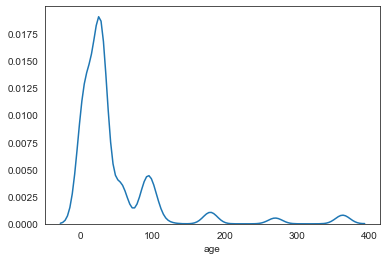

In [794]:
# Check skewness of age
sns.distplot(df1['age'],hist=False)
plt.show()

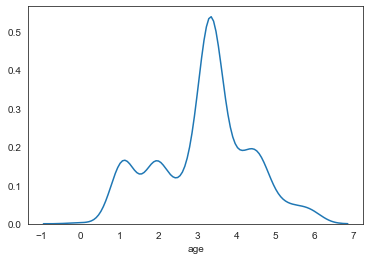

In [795]:
# Skewness of Age after log transformation
sns.distplot(np.log(df1['age']),hist=False)
plt.show()

In [796]:
# log transformation of age to reduce skewness
df1['age'] = np.log(df1['age'])
df1.skew()                                   # Verify age Skenewness after logrithimic transformation

cement          0.564959
slag            0.855225
ash             0.497231
water           0.034433
superplastic    0.980604
coarseagg      -0.065256
fineagg        -0.252353
age            -0.142556
strength        0.395696
dtype: float64

### 2. Bivariate Analysis

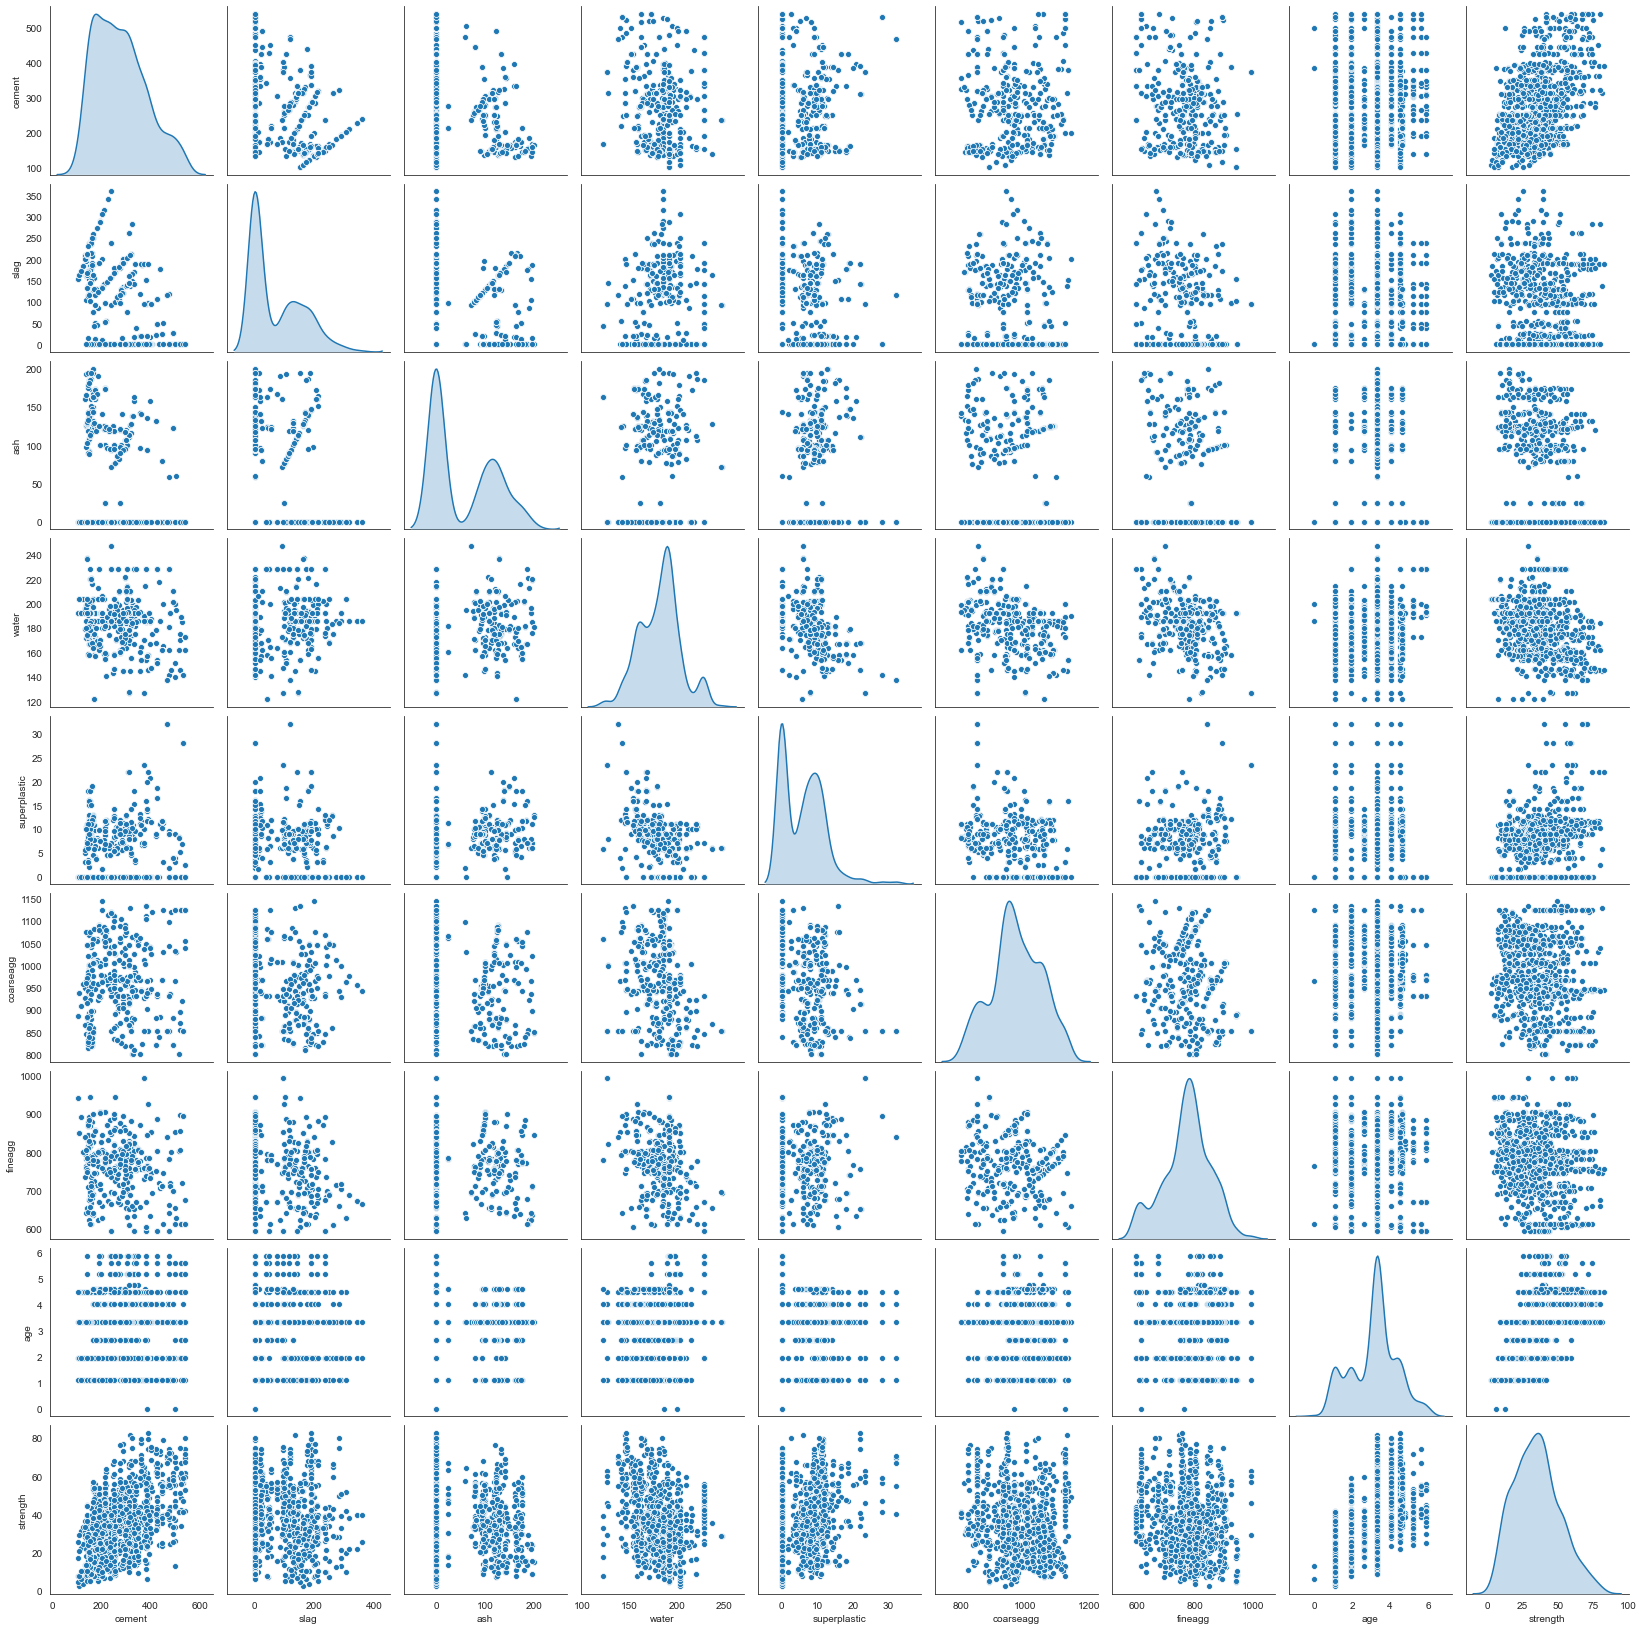

In [797]:
# Pairplot using sns
import seaborn as sns
sns.pairplot(df1 , diag_kind = 'kde')
plt.show()

#####  Strength is increasing as inreaseing in age, Strength has strong positive coorelation with age.
#####  Strength have a linear relationship with Quantity of cement in Concrete Mixture

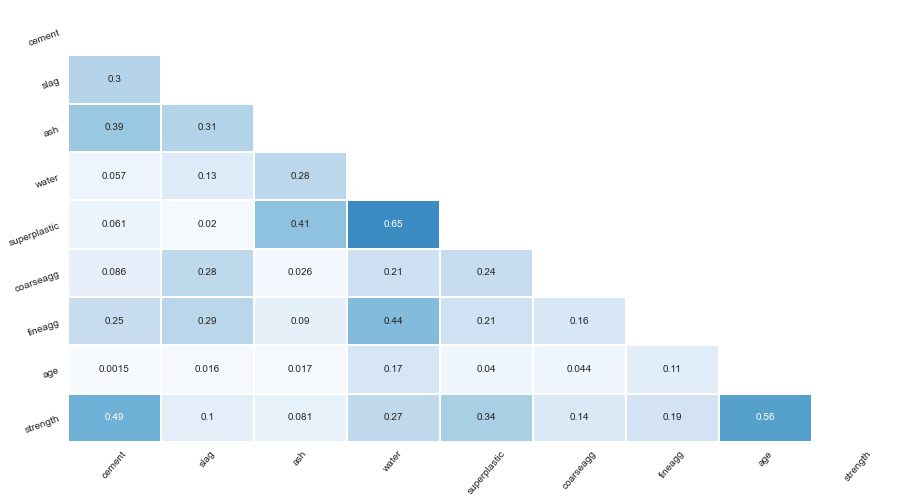

In [798]:
corr = abs(df1.corr())                        # correlation matrix
lower_triangle = np.tril(corr, k = -1)        # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0                    # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))                  # setting the figure size
sns.set_style(style = 'white')                # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Do Heatmap
plt.xticks(rotation = 50)                     # Aesthetic purposes
plt.yticks(rotation = 20)                     # Aesthetic purposes
plt.show()

#### "cement","age","superplastic" have the highest correlation with the Strength (target)

### 3. Feature Engineering Techniques
###### 3.1 Extract new features which provide better information coorelation to target variable.

    1.  Extract new column to show Water & Cement Ration and it's correlation to Strenght
    2.  Extract new column to show Coarse Aggregate & Fine Aggregate Ratio and it's correlation to Strenght
    3.  Extract new column to show Water & Superplastic Ration and it's correlation to Strenght, 
    *** Although Superplastic is not essesntial component of concrete and missing in ~36% of samples in dataframe bust has very storng corelation with Water.

In [799]:
df1['water:cement'] = df1['water']/df1['cement']                           # Extracting a new column

In [800]:
df1['coarseagg:fineagg'] = df1['coarseagg'] / df1['fineagg']               # Extracting a new column

In [801]:
df1['water:superplastic'] = df1['water']/df1['superplastic']               # Extracting a new column

In [802]:
df1 = df1[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg', 'age','water:cement', 
           'coarseagg:fineagg', 'water:superplastic','strength']]          # rearranging columns

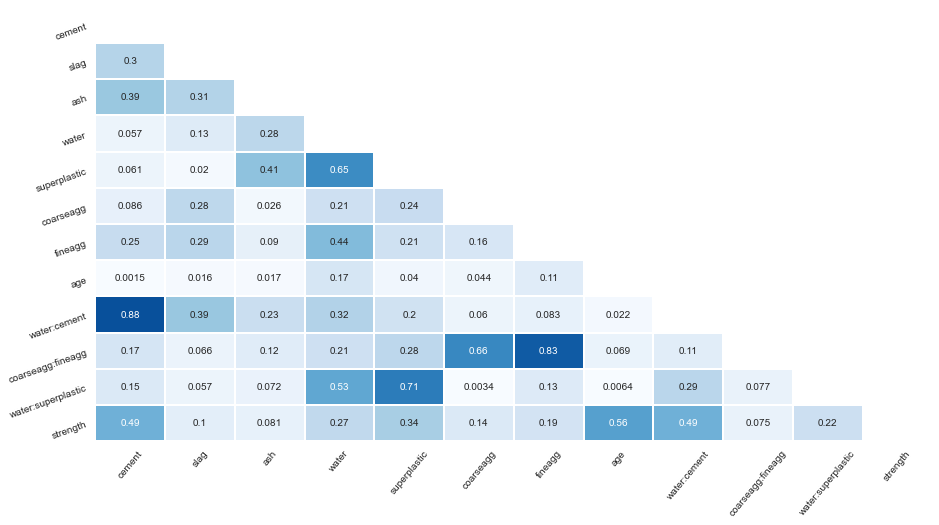

In [803]:
corr = abs(df1.corr())                        # correlation matrix
lower_triangle = np.tril(corr, k = -1)        # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0                    # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))                  # setting the figure size
sns.set_style(style = 'white')                # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Do Heatmap
plt.xticks(rotation = 50)                     # Aesthetic purposes
plt.yticks(rotation = 20)                     # Aesthetic purposes
plt.show()

###### So we have water:cement ratio a new feature in place of water and cement because it shows high correlation with strength

###### coarseagg:fineagg, water:superplastic, doesn't add value to coorelation so we will drop it

In [804]:
# As we already taken the info related to 'water' and 'cement' in 'water:cement' feature, therefore dropping 'water' and 'cement'

# 'coarseagg:fineagg' and 'water:superplastic'was not a feature because individual columns provide more infomation.

df1 = df1.drop(['cement','water','coarseagg:fineagg','water:superplastic'],axis=1)

###### 3.2 Preparing Data model and do train test split

In [805]:
# Separating dependent and independent variables
x = df1.drop('strength',axis=1)
y = df1['strength']

In [806]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=7)

In [807]:
# Verify Split in Test and Traing Set
print("Total Entries in Trainng Dataset: ",len(xtrain),"which is","{0:0.2f}%".format((len(xtrain)/len(df1.index)) * 100), " of Original Data")
print("Total Entries in Trainng Dataset: ",len(xtest),"which is","{0:0.2f}%".format((len(xtest)/len(df1.index)) * 100), " of Original Data")

Total Entries in Trainng Dataset:  703 which is 69.95%  of Original Data
Total Entries in Trainng Dataset:  302 which is 30.05%  of Original Data


###### 3.3 Identify Model complexity (Linear, Quadratic, Higher Degree model)
Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree.

In [808]:
#Degree 1 (Simple Liner Model)

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=7)

model.fit(xtrain,ytrain)

print("Traing Accuracy Score  ",(model.score(xtrain,ytrain)).round(4))

print("Testing Accuracy Score ",(model.score(xtest,ytest)).round(4))

Traing Accuracy Score   0.9961
Testing Accuracy Score  0.8338


In [809]:
#Degree 2 (Quadratic Ploynomial Model)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipeline = Pipeline([
    ('poly',PolynomialFeatures(degree=2)),
    ('reg', DecisionTreeRegressor(random_state=7))
])

pipeline.fit(xtrain,ytrain)

print("Traing Accuracy Score  ",(pipeline.score(xtrain,ytrain)).round(4))

print("Testing Accuracy Score ",(pipeline.score(xtest,ytest)).round(4))

Traing Accuracy Score   0.9961
Testing Accuracy Score  0.8305


In [810]:
#Degree 3 (Higher Dregree Polynomial Model)

pipeline = Pipeline([
    ('poly',PolynomialFeatures(degree=3)),
    ('reg', DecisionTreeRegressor(random_state=7))
])

pipeline.fit(xtrain,ytrain)

print("Traing Accuracy Score  ",(pipeline.score(xtrain,ytrain)).round(4))

print("Testing Accuracy Score ",(pipeline.score(xtest,ytest)).round(4))

Traing Accuracy Score   0.9961
Testing Accuracy Score  0.8081


###### Comparing the accuracy scores above, it shows Testing score decreasing by increasing the model complexity. 
###### As simple liner model provides best tesing score, therefore going forward Degree 1 complexity Linear Model will be used 

### 4. Creating the Models

###### K fold Cross Validation split the data in 5 equal sets
###### Create Dataframe (list to store model Perfromance metrics for comparison)

In [811]:
from sklearn.model_selection import cross_val_score,KFold
k =  KFold(random_state=7,n_splits=5)                             # KFold will split the data in 5 equal parts

In [812]:
# Blanks list to store model name, cross validation r2 score (mean and standard deviation) and RMSE

algo= []                                        # Store Model Algorithm Name
cv_r2_mean = []                                 # Cross Validation r2 score mean
cv_r2_std = []                                  # Cross Validation r2 score standard deviation
cv_rmse_mean = []                               # Cross Validation root mean Square error score mean

# MAPE (Mean Absolute Percentage Error)

In [813]:
# Clear the lists to remove old entries (if any) store in last run of code. 
algo.clear()
cv_r2_mean.clear()
cv_r2_std.clear()
cv_rmse_mean.clear()

In [814]:
# Define subfunction to store and Print Model Perfomance Metrics
def Model_Performance():
    algo.append(algo1)
    cv_r2_mean.append(cross_val_score(model, xtest, ytest, cv=k).mean())
    cv_r2_std.append(cross_val_score(model, xtest, ytest, cv=k).std())
    cv_rmse_mean.append((-cross_val_score(model, xtest, ytest, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

# when we use mean squared error as scoring in cross val score it gives output with a negative sign,So we use Negative sign to make it positive.

    print("algo         :", algo1)
    print("cv_r2_mean   :", cross_val_score(model, xtest, ytest, cv=k).mean())
    print("cv_r2_std    :", cross_val_score(model, xtest, ytest, cv=k).std())
    print("cv_rmse_mean :", (-cross_val_score(model, xtest, ytest, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

###### 4.1 Linear Regression Model

In [815]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('reg', LinearRegression())
])

algo.append('Linear Regression')
cv_r2_mean.append(cross_val_score(pipeline, xtest, ytest, cv=k).mean())
cv_r2_std.append(cross_val_score(pipeline, xtest, ytest, cv=k).std())
cv_rmse_mean.append((-cross_val_score(pipeline, xtest, ytest, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

print("algo         :", 'Linear Regression')
print("cv_r2_mean   :", cross_val_score(pipeline, xtest, ytest, cv=k).mean())
print("cv_r2_std    :", cross_val_score(pipeline, xtest, ytest, cv=k).std())
print("cv_rmse_mean :", (-cross_val_score(pipeline, xtest, ytest, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

algo         : Linear Regression
cv_r2_mean   : 0.7351838447096266
cv_r2_std    : 0.030935191073600828
cv_rmse_mean : 8.206006960598273


###### 4.2 Decision Tree Regression Model

In [816]:
model = DecisionTreeRegressor(random_state=7)

algo1 = 'Decision Tree'
Model_Performance()                  # Call subFunction defined to store and Print model Perfromance Metrics

algo         : Decision Tree
cv_r2_mean   : 0.6768330597291106
cv_r2_std    : 0.08567947454774745
cv_rmse_mean : 9.02743499400789


###### 4.3 Random Forest Regression Model

In [817]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=7)

algo1 = 'Random Forest'
Model_Performance()                  # Call subFunction defined to store and Print model Perfromance Metrics

algo         : Random Forest
cv_r2_mean   : 0.8262646408617964
cv_r2_std    : 0.03563389832991959
cv_rmse_mean : 6.6452487406366085


###### 4.4 Bagging Regression Model

In [818]:
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor(random_state=7)

algo1 = 'Bagging'
Model_Performance()                  # Call subFunction defined to store and Print model Perfromance Metrics

algo         : Bagging
cv_r2_mean   : 0.7973465843377682
cv_r2_std    : 0.04352001436558976
cv_rmse_mean : 7.211685853568324


###### 4.5 AdaBoost Regression Model

In [819]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor(random_state=7)

algo1 = 'AdaBoost'
Model_Performance()                  # Call subFunction defined to store and Print model Perfromance Metrics

algo         : AdaBoost
cv_r2_mean   : 0.7681012192902024
cv_r2_std    : 0.022665426913345357
cv_rmse_mean : 7.705179323130505


###### 4.6 GradientBoost Regression Model

In [820]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=7)

algo1 = 'Gradient Boosting'
Model_Performance()                  # Call subFunction defined to store and Print model Perfromance Metrics

algo         : Gradient Boosting
cv_r2_mean   : 0.8578155555720743
cv_r2_std    : 0.01489692106023279
cv_rmse_mean : 6.033773744221057


###### 4.7 DataFrame to compare Models Performance Metrics

In [821]:
results = pd.DataFrame()
results['Model'] = algo
results['CV R2 Score mean'] = cv_r2_mean
results['CV R2 Score std'] = cv_r2_std
results['CV RMSE'] = cv_rmse_mean
results = results.set_index('Model').round(3)               # Print the results rounded to 3 decimal points
results

CV R2 Score mean  CV R2 Score std  CV RMSE
Model                                                        
Linear Regression             0.735            0.031    8.206
Decision Tree                 0.677            0.086    9.027
Random Forest                 0.826            0.036    6.645
Bagging                       0.797            0.044    7.212
AdaBoost                      0.768            0.023    7.705
Gradient Boosting             0.858            0.015    6.034

###### Gradient Boosting is the best algorithm, Random Forest is second and Bagging is Third best algorithm
###### Apply Hyper parameter Tuning on Gradient Boosting and Random Forest Models to further improve Model perfromance

### 5. Hyper Parameter Tuning

Techniques employed to squeeze that extra performance out of the model without making it overfit
    1. Use Grid Search or Random Search on any of the two models used above. 
    2. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above.
 
###### 5.1 Grid Search on Random Forest
A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.The sub-sample size is controlled with the `max_samples` parameter if `bootstrap=True` (default), otherwise the whole dataset is used to build each tree.

GridSearchCV Technique is exhaustive search over specified parameter values for an estimator. GridSearchCV implements a "fit" and a "score" method.The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [822]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=7)

rf.fit(xtrain,ytrain)

params = {
    'bootstrap': [True,False],
    'max_depth': [3,4,5, 6, None],                 # The maximum depth of the tree.
    'max_features': ['sqrt','log2'],               # The number of features to consider when looking for the best split. 
    'min_samples_leaf': [1,3, 4],                  # The minimum number of samples required to be at a leaf node.
    'min_samples_split': [2,3,5],                  # The minimum number of samples required to split an internal node
    'n_estimators': [25,50,'warn']                 # number of trees in a forest, default 100
}    

grid = GridSearchCV(estimator = rf, param_grid = params, cv = k)  # K fold CV used for splitting the data, default is 5 fold

grid.fit(xtrain,ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=False),
             estimator=RandomForestRegressor(random_state=7),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [3, 4, 5, 6, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [25, 50, 'warn']})

In [823]:
from sklearn.metrics import mean_squared_error                  # Import Mean Square Error score 

model = ['Random forest after GridSearchCV']                    # Create Dataframe to Compare model Perfromance
tr = [grid.score(xtrain,ytrain)]                                # Training Score
te = [grid.score(xtest,ytest)]                                  # Testing Sccore
rmse = [mean_squared_error(ytest,grid.predict(xtest))**0.5]     # Model Mean Square Error

###### 5.2 Random Search on Gradient Boosting

Randomized Grid search used to identify best hyper parameters.RandomizedSearchCV implements a "fit" and a "score" method. The parameters of the estimator used to apply these methods are optimized by cross-validated search over parameter settings.

In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

If all parameters are presented as a list, sampling without replacement is performed. If at least one parameter is given as a distribution, sampling with replacement is used.
It is highly recommended to use continuous distributions for continuous parameters.

In [824]:
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor(random_state=7)

gb.fit(xtrain,ytrain)

n_estimators = [int(x) for x in np.linspace(start = 50 , stop = 150, num = 25)]   # Number of trees in random forest returns evenly spaced 25 numbers
max_features = ['log2', 'sqrt']                                      # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(5, 10, num = 5)]            # returns evenly spaced numbers can be changed to any
max_depth.append(None)                                               # Maximum number of levels in tree
min_samples_split = [2,3,4,5,6,7,8,9,10]                             # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 3, 4]                                      # Minimum number of samples required at each leaf node
learning_rate = [float(x) for x in np.linspace(0.1, 1, num = 10)]    # Method of selecting samples for training each tree

# Create the random grid
params_r = {'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'learning_rate':learning_rate}

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available scores
# Use the random grid to search for best hyperparameters

random = RandomizedSearchCV(estimator=gb, param_distributions=params_r,cv = k, random_state=7)

random.fit(xtrain, ytrain)                                          # Fit the random search model

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=False),
                   estimator=GradientBoostingRegressor(random_state=7),
                   param_distributions={'learning_rate': [0.1, 0.2,
                                                          0.30000000000000004,
                                                          0.4, 0.5, 0.6,
                                                          0.7000000000000001,
                                                          0.8, 0.9, 1.0],
                                        'max_depth': [5, 6, 7, 8, 10, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [50, 54, 58, 62, 66, 70,
                         

##### Randomized Search CV provides best hyperparameter Values

In [825]:
random.best_params_

{'n_estimators': 120,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'learning_rate': 0.1}

In [826]:
model.append('Gradient Boosting after RandomSearchCV')             # Apend Model Perfromance
tr.append(random.score(xtrain,ytrain))                             # Training Score
te.append(random.score(xtest,ytest))                               # Testing Sccore
rmse.append(mean_squared_error(ytest,random.predict(xtest))**0.5)  # Model Mean Square Error

In [827]:
# Create DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = model
results['Training Score'] = tr
results['Testing Score'] = te
results['RMSE'] = rmse
results = results.set_index('Model')
results

Training Score  Testing Score  \
Model                                                                   
Random forest after GridSearchCV              0.996125       0.921927   
Gradient Boosting after RandomSearchCV        0.994950       0.937390   

                                            RMSE  
Model                                             
Random forest after GridSearchCV        4.500233  
Gradient Boosting after RandomSearchCV  4.030001

###### After Hyperparameter Tuning also Gradient Boosting Model gives better results.

    1. Model performance improved by ~8% by hyperparmeter tuning (93.7% vs 85.8% before hyper parameter tuning)
    2. Final model (Gradient Boost) able to predict concrete strength 93.7% accurately from all the independent variables.
    3. Model RMSE Score (standard deviation of prediction errors) is 4 Mpa which is good, thought it indicates model is overfit.  
##### Our final model is slightly overfit but the testing score is high enough so we can use this model for now or we can try to reduce noise by changing parameters